In [275]:
import pandas as pd
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv1D
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy, precision_score as precision, recall_score as recall, f1_score as f1
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [144]:
def apply_bool(x):
  if type(x) is not str: return x
  if x == 'Yes' or x.startswith('Yes'):
    return 1
  elif x == 'No' or x.startswith('No'):
    return 0
  return x

In [278]:
data = pd.read_csv("heart_2020_cleaned.csv")

In [279]:
data = data.applymap(apply_bool)
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'Female' else 0)

In [280]:
age_cats = sorted(data['AgeCategory'].value_counts().index)
enc = OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Very good', 'Excellent'], 
                                 age_cats])
enc_cols = ['GenHealth', 'AgeCategory']
ordinal_df = pd.DataFrame(enc.fit_transform(data[enc_cols]), 
                          columns=enc_cols)

data[enc_cols] = ordinal_df[enc_cols]

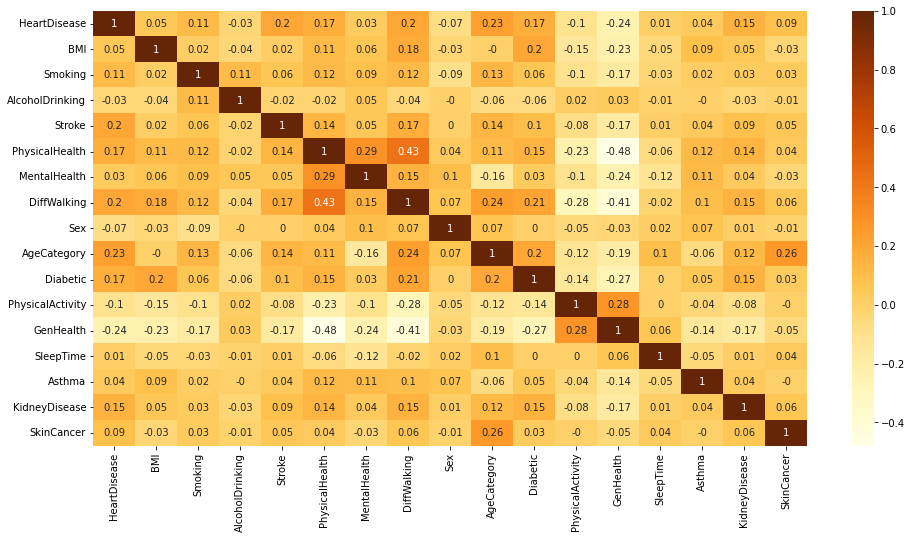

In [281]:
plt.figure(figsize = (16,8))
sns.heatmap(data.corr().round(2), annot=True, cmap='YlOrBr')

In [244]:
enc = OneHotEncoder() 

categ = data[['AgeCategory', 'Race', 'GenHealth']]
encoded_categ = pd.DataFrame(enc.fit_transform(categ).toarray())

data = pd.concat([data, encoded_categ], axis = 1)

data = data.drop(columns = ['AgeCategory', 'Race', 'GenHealth'], axis=1)

In [246]:
y = data['HeartDisease'].to_numpy()
X = data.drop(columns=['HeartDisease']).to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

input_dim = x_train.shape[1]

In [270]:
model = Sequential()

model.add(Dense(16, input_dim=input_dim, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [271]:
model.fit(x_train, y_train, validation_split=0.2, epochs=25, batch_size=500)

Epoch 1/25
410/410 [==============================] - 2s 3ms/step - loss: 0.3003 - accuracy: 0.9105 - val_loss: 0.2350 - val_accuracy: 0.9143
Epoch 2/25
410/410 [==============================] - 1s 2ms/step - loss: 0.2313 - accuracy: 0.9156 - val_loss: 0.2275 - val_accuracy: 0.9154
Epoch 3/25
410/410 [==============================] - 1s 2ms/step - loss: 0.2279 - accuracy: 0.9162 - val_loss: 0.2260 - val_accuracy: 0.9156
Epoch 4/25
410/410 [==============================] - 1s 2ms/step - loss: 0.2270 - accuracy: 0.9163 - val_loss: 0.2259 - val_accuracy: 0.9154
Epoch 5/25
410/410 [==============================] - 1s 2ms/step - loss: 0.2266 - accuracy: 0.9164 - val_loss: 0.2257 - val_accuracy: 0.9155
Epoch 6/25
410/410 [==============================] - 1s 2ms/step - loss: 0.2263 - accuracy: 0.9163 - val_loss: 0.2256 - val_accuracy: 0.9157
Epoch 7/25
410/410 [==============================] - 1s 2ms/step - loss: 0.2263 - accuracy: 0.9165 - val_loss: 0.2266 - val_accuracy: 0.9158
Epoch 

In [276]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 16)                624       
                                                                 
 dense_35 (Dense)            (None, 8)                 136       
                                                                 
 dense_36 (Dense)            (None, 8)                 72        
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [272]:
preds = model.predict(x_test)
preds = (preds > 0.4).astype(int).reshape(-1)

In [273]:
print("accuracy: ", accuracy(preds, y_test))
print("precision: ", precision(preds, y_test))
print("recall: ", recall(preds, y_test))
print("f1: ", f1(preds, y_test))

accuracy:  0.91281914976782
precision:  0.1688429452303228
recall:  0.4838877338877339
f1:  0.25033611185802634
